## Libraries

### Import Data Analytics Libraries
- Pandas
- Numpy
- Matplotlib
- Datetime

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
# %matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


Bad key text.latex.preview in file C:\Users\rudra\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\rudra\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\rudra\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

In [2]:
from sklearn.preprocessing import MinMaxScaler

### Import Project Specific Libraries
- **Yahoo Finance (yfinance)**: Gather ticker data
- **Backtrader Technical Analysis Library (bta-lib)**: Gather trends and pattern indicators

In [3]:
import btalib
import yfinance as yf

### Import Web Scraping Libraries
- **requests**: Gather web data
- **urllib**: Gather web data
- **BeautifulSoup**: Extract web data

In [4]:
import requests
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

### Import Deep Learning Libraries
- **PyTorch**: Create neutral networks
- **TensorBoard**: Visualize training statistics


In [5]:
import torch
import torch.utils.tensorboard as tb


### Import Natural Language Processing Tools
- **transformers**: Use pre-trained deep learning models

In [6]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

### Import API Keys
- **config**: Holds all private API keys


In [7]:
from config import *

## Data Collection

We will be using Yahoo Finance in order to find the ticker data. This data will include:

- **Date/DateTime**: Index
- **Open**: Price of asset at beginning of Date/Datetime
- **High**: Highest price of asset during Date/Datetime
- **Low**: Lowest price of asset during Date/Datetime
- **Close**: Price of stock at end of Date/Datetime
- **Adj Close**: Close price adjusted due to corporate actions such as dividend payouts, stock splits, or the issuance of more shares

In [8]:
def get_data(symbol, interval = "1d", start_date = "2020-01-01", end_date = "2021-12-31"):
   
    '''
    Returns asset information

            Parameters:
                    symbol (string): ticker symbol for lookup
                    interval (string): periods between datapoints (valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo)
                    start_date (string): format YYYY-MM-DD
                    end_date (string): format YYYY-MM-DD
            Returns:
                    (DateFrame): Asset Information  
    '''

    return yf.download(symbol, start=start_date, end=end_date, interval=interval)

In [9]:
data = get_data("AAPL")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.894333,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.175926,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.758995,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.412117,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.593040,132079200


# Feature Construction

## Technical Analysis

A part of this study is to try and see if a model can use technical analysis (TA) as a way to create a trading strategy

Technical analysis is the study of trends and patterns in order to predict profitable trading decisions. There are 4 types of indictors we will in this study:

- trend indictors
- momentum indicators
- volatility indicators
- volume indicators. 

Typically, traders use only a 2-3 indictors for their strategy, however, our job is to also see if a model can determine which indictors are more important when making these decisions as well.

In order to add TA to our data, we will be using bta-lib.

Below, we will go in depth into a few indictors and how they are used

### Simple Moving Average

The simple moving average indictor is a trend indictor that finds the average price within a certain window of time. This helps smooth out the noise in price changes and helps trades seen the general trend of the asset's price.

Many traders also use two different moving averages on the same asset. One moving average would have a longer period than the other. In order to buy, the shorter moving average would have to greater than the longer moving average, indicating that there is a rapid change in price upwards. The same is true vice versa.

We will test if the model could potentially recognize this pattern and gauge if it is useful.



![SMA](images/SMA.PNG)

This chart shows Apple stock prices using the moving average indictors. The purple line shows the short term moving average of 12 days and the yellow line shows the long term moving average of 26 days. The green "up" arrow shows where a trader would buy and the red "down" arrow shows where a trader would sell using this strategy.

In [10]:
def get_MA(data, short_period=12, long_period=26):

    '''
    Adds Moving Averages to asset data

        Parameters:
                data (DataFrame): asset data
                short_period (int): period over moving average taken (<long_period)
                long_period (int): period over moving average taken (>short_period)

        Returns:
                (DateFrame): Asset Information
    '''

    # get Moving Averages
    ShortMA = btalib.sma(data, period=short_period)
    LongMA = btalib.sma(data, period=long_period)

    # add to current data
    data["ShortMA"] = ShortMA.df
    data["LongMA"] = LongMA.df

    return data

### Exponential Moving Average

The exponential moving average is similar to the simple moving average, however, it gives higher weigh to more recent changes within the window of time. This could better help find short term price trends than the simple moving average.

Note: may only use this rather than the simple moving average for the model.

![EMA](images/EMA.PNG)

This chart shows Apple stock prices using the exponential moving average indictors. The purple line shows the short term moving average of 12 days and the yellow line shows the long term moving average of 26 days. The green "up" arrow shows where a trader would buy and the red "down" arrow shows where a trader would sell using this strategy.

In [11]:
def get_EMA(data, short_period=12, long_period=26):
    '''
    Adds Exponential Moving Averages to asset data

        Parameters:
                data (DataFrame): asset data
                short_period (int): period over moving average taken (<long_period)
                long_period (int): period over moving average taken (>short_period)

        Returns:
                (DateFrame): Asset Information 
    '''
    # get Exponential Moving Averages
    ShortEMA = btalib.ema(data, period=12)
    LongEMA = btalib.ema(data, period=26)
    
    # add to data
    data["ShortEMA"] = ShortEMA.df
    data["LongEMA"] = LongEMA.df

    return data

### Bollinger Bands


The Bollinger Bands indictors is a kind of volatility indictor which uses the moving average over a portion of days and finds a certain standard deviation above and below that moving average. This indictor relies on the theory of mean reversion where asset prices, after spikes in price changes, revert towards the moving average of price. This indictor also shows how volatile an asset is; if the bands are farther apart, then more volatile the asset is. Traders may use this strategy by buying an asset when the price reaches the lower standard deviation and then sell at the higher standard deviation. Usually, traders use 2 standard deviations away from the mean and have a moving average window of 20 periods.

![Simple Bollinger Bands](images/simpleBBands.PNG)

The purple lines are two standard deviations and the yellow line is the moving average.

Of course, this strategy by itself or unaltered is not perfect, as it may miss out on trends. However, with stop losses (selling if price drops below certain value), band line slopes, and pattern recognition, this strategy may help the model learn more about correct buy and sell signals.

Another possible way to improve this strategy is to add another set of Bollinger Bands that have a different standard deviation.

![Double Bollienger Bands](images/doubleBBands.PNG)

Now the added blue lines are one standard deviation away from moving average and in this case, a strategy could be that a trader could buy at the lower wider (2 std) line and sell when the price touches the upper wider line and then falls below the upper narrow line (1 std)

More research is needed to be done in this case but this might help model learn.

In [12]:
def get_BBands(data, period=20, wider_std=2, narrow_std=1):
    
    '''
    Adds Bollinger Bands to asset data

        Parameters:
                data (DataFrame): ticker symbol for lookup
                period (int): period over moving average taken
                wider_std (float): standard deviation of wider bands (>narrow_std)
                narrow_std (float): standard deviation of narrow bands (<wider_std)


        Returns:
                (DateFrame): Asset Information 
    '''

    try:
        # get Bollinger Bands (regular and narrowed)
        mid, top, bot = btalib.bbands(data, period = period, devs = wider_std)
        mid_narrow, top_narrow, bot_narrow = btalib.bbands(data, period = period, devs = narrow_std)
    except ValueError:
        print("Data broken...check timeframe")
        return None

    # add to asset data
    data["Mid BBand"] = list(mid)
    data["Top BBand"] = list(top)
    data["Bot BBand"] = list(bot)
    data["Volatility"] = data["Top BBand"] - data["Bot BBand"]
    
    data["Mid BBand Narrow"] = list(mid_narrow)
    data["Top BBand Narrow"] = list(top_narrow)
    data["Bot BBand Narrow"] = list(bot_narrow)
    
    return data

### Relative Strength Index

The Relative Strength Index (RSI) is a momentum indictor that shows how oversold or overbought an asset is. Typically traders would sell when RSI is above 70 as the asset would be considered overbought and overvalued and buy when RSI is below 30 as the asset would then be considered oversold and undervalued. It is calculated using 

$100-(100/(1+(Avg Gain/Avg Loss)))$ 

This average gain and loss is computed over a given period. This period is typically 14 days.

![RSI](images/RSI.PNG)

Here we see that RSI does a decent job at capturing trends. The goal of the model is to create its own interpretation of RSI if useful for modeling

In [13]:
def get_RSI(data, period=14):
    '''
    Adds RSI to asset data

        Parameters:
                data (DataFrame): ticker symbol for lookup
                period (int): period over averages taken

        Returns:
                (DateFrame): Asset Information 
    '''
    rsi = btalib.rsi(data, period = period)

    data["RSI"] = rsi.df

    return data


### Moving Average Convergence Divergence

The Moving Average Convergence Divergence (MACD) is a trend/momentum indictor that finds the difference between two exponential moving averages (EMA). The MACD provides 3 metrics: MACD line, Signal line, and a histogram. The histogram represents how much the difference is between the two EMA's. Traders would usually buy when the MACD line crosses above the Signal line. In the case of the code, the model should buy when MACD changes from negative to positive and sell vice versa. The typical EMA periods are 12 periods and 26 periods.

![MACD](images/MACD.PNG)

In the chart, the blue line is the MACD line and the orange line is the signal line. We see that this can see trends.

In [14]:
def get_MACD(data):
    '''
    Adds MACD to asset data

        Parameters:
                data (DataFrame): ticker symbol for lookup

        Returns:
                (DateFrame): Asset Information 
    '''
    MACD = data["ShortEMA"] - data["LongEMA"]

    data["MACD"] = MACD
    
    return data

### Rate of Change

Rate of change (ROC) is a momentum indictor that gets the percent difference between the current price and a price from a past period. If ROC changes from negative to positive, then buy, however, if ROC changes from positive to negative, then sell. Typically, traders use the current price and the last 12th price to calculate this value.

![ROC](images/ROC.PNG)

Using ROC, we are able to pick up trends as well. The ROC chart is the blue line chart below price chart.

In [15]:
def get_ROC(data, period=12):
    '''
    Adds Rate of Change to asset data

        Parameters:
                data (DataFrame): ticker symbol for lookup

        Returns:
                (DateFrame): Asset Information 
    '''
    roc = btalib.roc(data, period=period)
    data["ROC"] = roc.df
    
    return data


In [16]:
# def get_TA(data):
#     data = get_BBands(data)
#     data = get_RSI(data)
#     data = get_EMA(data)
#     data = get_MA(data)
#     data = get_MACD(data)
#     data = get_ROC(data)

#     #data = get_spy_return(data)
#     data = get_t_bond(data)   

#     return data

# def plot_TA(data, bbands=False, rsi=False, ema=False, ma=False, macd=False, roc=)

## Market Correlation

### Standard & Poor's 500

The Standard & Poor's 500 Index (S&P 500) is considered to be a measure of market health. This is because the S&P 500 tracks the performance of the top 500 companies in the US market. If these companies are not doing well, the S&P 500 will drop and also be a good indictor that the rest of the market may not being doing well either. This can be used to compare to the current stock and if the trend of the S&P 500 is downwards, then it is also likely that the asset in question also has a downward trend.

In [17]:
def get_spy_return(data):
    '''
    Adds S&P 500 to asset data

        Parameters:
                data (DataFrame): ticker symbol for lookup

        Returns:
                (DateFrame): Asset Information 
    '''
    spy_data = get_data("SPY")
    closes = spy_data["Close"]

    #returns = [y - x for x,y in zip(closes,closes[3:])]
    #data["SPY_returns"] = returns
    
    data["SPY_returns"] = closes
    return data

### Treasury Bond Yield

Treasury bonds (T-bonds) are government based, "zero-risk," bonds. Treasury bonds prices are inversely correlated with interest rates. If interest rates rise, then bond prices will fall and investors would rather save their money rather than invest, which also causes the demand in the market to fall. In order to increase demand for these bonds and the market during times of high interest rates, bonds also have higher yields.

This means that yields are correlated with interest rates. If we can capture the treasury bond yield, then we will also know the trend in interest rates and may make better market decisions. In this case, we will be using the 10-year treasury bond yield rates as a feature in our model.


In [18]:
def get_t_bond(data):
    '''
    Adds T Bond Yield to asset data

        Parameters:
                data (DataFrame): ticker symbol for lookup

        Returns:
                (DateFrame): Asset Information 
    '''
    t_data = get_data("^TNX")
    data["Treasury_Yield_10_Years"] = t_data["Close"]
    return data

## Market Sentiment


### Get Asset News Headlines

Many investors look towards the news in order to find out how well the asset is performing and what future price changes may look like. We can scrape these new articles using an API and website. The API we will be using is the Finnhub API. The Finnhub API has a feature that allows for historical headlines however there are not many and they do not go far back in time. The Finviz website gives daily news updates for any ticket symbol that can be scraped. These two sources of new headlines can be used for sentiment analysis.

In [19]:
def get_past_headlines(symbol, end_date = "2022-01-21"):
    end_date_news = datetime.strptime(end_date, '%Y-%m-%d')
    start_news_date = end_date_news - dt.timedelta(days=365)
    start_news_date  = start_news_date.strftime("%Y-%m-%d")
    r = requests.get('https://finnhub.io/api/v1/company-news?symbol={}&from={}&to{}&token={}'.format(symbol, start_news_date, end_date, FINNHUB_API_KEY))
    df = pd.DataFrame()
    df["datetime"]=pd.to_datetime([i["datetime"] for i in r.json()], unit='s')
    df["datetime"] = df["datetime"].dt.date
    df["headline"] = [i["headline"] for i in r.json()]
    df["summary"] = [i["summary"] for i in r.json()]

    return df

def get_current_headlines(symbol):

    finwiz_url = 'https://finviz.com/quote.ashx?t='

    url = finwiz_url + symbol
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response, "lxml")
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    
    parsed_news = []

    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        
        # split text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 2:
            date = date_scrape[0]
            time = date_scrape[1]

            date = datetime.strptime(date, '%b-%d-%y').date()
 
        else:
            date = parsed_news[-1][0]
            time = date_scrape[0]

        summary = ""
        parsed_news.append([date,text,summary])
    
    news = pd.DataFrame(parsed_news, columns=["datetime", "headline", "summary"])

    return news

In [20]:
current = get_current_headlines("AAPL")
past = get_past_headlines("AAPL")

news = pd.concat([current, past])

In [21]:
news

,datetime,headline,summary
0,2022-03-30,Why Apples hardware subscription service could...,
1,2022-03-30,"Stock Picks: Apple, Nvidia Reveal 7 Telltale T...",
2,2022-03-30,Apple's (NASDAQ:AAPL) Valuation may be Justifi...,
3,2022-03-30,Google asked its Russian translators not to re...,
4,2022-03-30,Ciena's (CIEN) GeoMesh Extreme Solution Levera...,
...,...,...,...
216,2022-03-25,"Apple to let people subscribe to iPhones, repo...",Apple could offer the iPhone in a new subscrip...
217,2022-03-25,EXCLUSIVE-Apple has not fully complied with or...,Apple has yet to fully comply with an order to...
218,2022-03-25,"After Hours Most Active for Mar 25, 2022 : BBD...",The NASDAQ 100 After Hours Indicator is down -...
219,2022-03-25,U.S. Stocks Mixed as Biden's Europe Trip Produ...,U.S. stocks opened mixed on Friday as Presiden...


### Get News Sentiment
Using the new headlines pulled from the API and website, we can get the sentiment of the asset on each period. We can use a pre-trained BERT model to get the sentiment of the headline's text. There is a BERT model that is trained on financial data. We will be using this model. This sentiment may be able to help the model make better trading decisions. 

In [22]:
def get_sentiment(data, news):
    
    tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
    model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")



    inputs = tokenizer(news["headline"].tolist(), padding = True, truncation = True, return_tensors='pt')

    outputs = model(**inputs)

    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)

    positive = predictions[:, 0].tolist()
    negative = predictions[:, 1].tolist()
    neutral = predictions[:, 2].tolist()

    table = {'Headline':news["headline"].tolist(),
            "Positive":positive,
            "Negative":negative, 
            "Neutral":neutral}
        
    df = pd.DataFrame(table, columns = ["Headline", "Positive", "Negative", "Neutral"])
    news["Sentiment"] = df["Positive"] - df["Negative"]
    
    news.drop(['headline', 'summary'], axis=1, inplace=True)

    result = news.groupby(['datetime']).mean()
    
    dates_in_data = [i.strftime('%Y-%m-%d') for i in data.index]

    
    result.index = [i.strftime('%Y-%m-%d') for i in result.index]

    result = result[result.index.isin(dates_in_data)]
    number_missing = data.shape[0]-len(result)
    missing = [0] * number_missing
    senti = missing + result["Sentiment"].tolist()

    data["Sentiment"] = senti

    
    return data

In [23]:
def get_TA(data):
    data = get_BBands(data)
    data = get_RSI(data)
    data = get_EMA(data)
    data = get_MA(data)
    data = get_MACD(data)
    data = get_ROC(data)

    data = get_spy_return(data)
    data = get_t_bond(data)   

    return data

https://www.researchgate.net/publication/324802031_Algorithmic_Financial_Trading_with_Deep_Convolutional_Neural_Networks_Time_Series_to_Image_Conversion_Approach

In [53]:
def get_labels(data):
    counter_row = 0 #counterRow
    num_periods = len(data) #numberOfDaysInFile
    labels = []
    #labels[:] = np.nan

    print(data.shape)

    while(counter_row < num_periods-1):
       #print(data.iloc[counter_row]["Close"])
       
        #try:
        if (data.iloc[counter_row]["Close"] < data.iloc[counter_row+1]["Close"]):
            labels.append(1) #it goes up
        else:
            labels.append(0) #it goes down
        
        # except IndexError:
        #     print(counter_row)
        #     print(counter_row+1)
        
        counter_row+=1

    data.drop(data.tail(1).index,inplace=True)        

    data["Target"] = labels
    data["Target"] =  data["Target"]
    return data

## Compile all Features

In [56]:
symbol = "AAPL"

data = get_data(symbol)
data.head()

print("getting TA")
data = get_TA(data)

print("getting news")
current = get_current_headlines(symbol)
past = get_past_headlines(symbol)

news = pd.concat([current, past])
print("calculating sentiment")

data = get_sentiment(data, news)

print("getting true labels")
data = get_labels(data)
data.head()

[*********************100%***********************]  1 of 1 completed
getting TA
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
getting news
calculating sentiment
getting true labels
(504, 23)


,Open,High,Low,Close,Adj Close,Volume,Mid BBand,Top BBand,Bot BBand,Volatility,...,ShortEMA,LongEMA,ShortMA,LongMA,MACD,ROC,SPY_returns,Treasury_Yield_10_Years,Sentiment,Target
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.894325,135480400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,324.869995,1.882,0,0
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.175919,146322800,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,322.410004,1.788,0,1
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.759003,118387200,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,323.640015,1.811,0,0
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.412125,108872000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,322.730011,1.827,0,1
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.593040,132079200,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,324.450012,1.874,0,1


In [57]:
def plot_labels(data, symbol):

    df = data.copy()
    df["Buy"] = [df.iloc[i]["Close"] if df.iloc[i]["Target"] == 1.0 else np.nan for i in range(len(df["Target"]))]
    df["Sell"] = [df.iloc[i]["Close"] if df.iloc[i]["Target"] == 0.0 else np.nan for i in range(len(df["Target"]))]

    #df["Sell"] = [df["Close"] if i == 0.0 else np.nan for i in df["Target"]]
    fig = plt.figure(figsize=(8, 6))
    plt.plot(df["Close"], color = "blue", alpha = .5)
    
    if(not df["Buy"].isnull().all()):
        plt.scatter(df.index, df["Buy"], color = 'green', marker="^", alpha=1)
    if(not df["Sell"].isnull().all()):
        plt.scatter(df.index, df["Sell"], color = 'red', marker="v", alpha=1)

    plt.show() 
    # fig.savefig('ML_charts/{}_target_chart.png'.format(symbol))
    plt.close(fig)

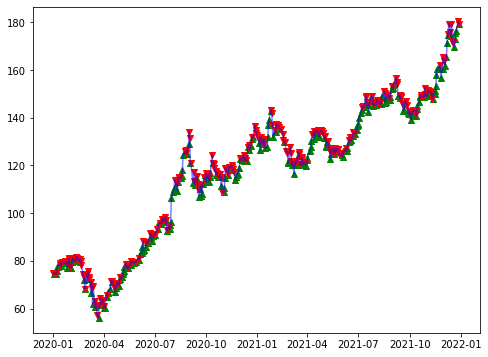

In [58]:
plot_labels(data, "AAPL")

In [59]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Mid BBand,Top BBand,Bot BBand,Volatility,...,ShortEMA,LongEMA,ShortMA,LongMA,MACD,ROC,SPY_returns,Treasury_Yield_10_Years,Sentiment,Target
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.894325,135480400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,324.869995,1.882,0,0
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.175919,146322800,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,322.410004,1.788,0,1
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.759003,118387200,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,323.640015,1.811,0,0
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.412125,108872000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,322.730011,1.827,0,1
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.593040,132079200,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,324.450012,1.874,0,1


In [60]:
data = data.dropna()
data.head()

,Open,High,Low,Close,Adj Close,Volume,Mid BBand,Top BBand,Bot BBand,Volatility,...,ShortEMA,LongEMA,ShortMA,LongMA,MACD,ROC,SPY_returns,Treasury_Yield_10_Years,Sentiment,Target
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-07,80.592499,80.849998,79.500000,80.007500,78.923004,117684000,79.195625,81.694409,76.696842,4.997567,...,79.436762,78.311923,79.502084,78.311923,1.124839,0.733392,332.200012,1.578,0,1
2020-02-10,78.544998,80.387497,78.462502,80.387497,79.297852,109348800,79.335875,81.770811,76.900939,4.869872,...,79.583029,78.465670,79.550417,78.515769,1.117359,0.726741,334.679993,1.547,0,0
2020-02-11,80.900002,80.974998,79.677498,79.902496,78.819427,94323200,79.369000,81.815814,76.922187,4.893627,...,79.632178,78.572101,79.577500,78.729039,1.060077,0.408403,335.260010,1.590,0,1
2020-02-12,80.367500,81.805000,80.367500,81.800003,80.691208,113730400,79.550500,82.148492,76.952509,5.195984,...,79.965689,78.811205,79.957708,78.992500,1.154484,5.907104,337.420013,1.630,0,0
2020-02-13,81.047501,81.555000,80.837502,81.217499,80.116608,94747600,79.719625,82.289127,77.150124,5.139002,...,80.158275,78.989449,80.107292,79.247116,1.168826,2.260063,337.059998,1.617,0,1


## Train-Val-Test Split

In [61]:
train_size = int(len(data)*.6)
val_size = int(len(data) *.1)
test_size = len(data)-train_size-val_size

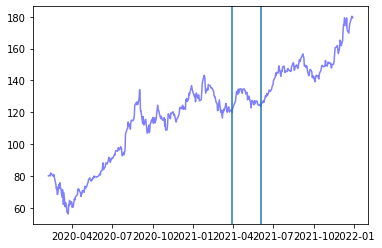

In [62]:
plt.plot(data["Close"], color = "blue", alpha = .5)
xcoords = [data.index[train_size], data.index[train_size+val_size]]
for xc in xcoords:
    plt.axvline(x=xc)

In [63]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Mid BBand,Top BBand,Bot BBand,Volatility,...,ShortEMA,LongEMA,ShortMA,LongMA,MACD,ROC,SPY_returns,Treasury_Yield_10_Years,Sentiment,Target
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-07,80.592499,80.849998,79.500000,80.007500,78.923004,117684000,79.195625,81.694409,76.696842,4.997567,...,79.436762,78.311923,79.502084,78.311923,1.124839,0.733392,332.200012,1.578,0,1
2020-02-10,78.544998,80.387497,78.462502,80.387497,79.297852,109348800,79.335875,81.770811,76.900939,4.869872,...,79.583029,78.465670,79.550417,78.515769,1.117359,0.726741,334.679993,1.547,0,0
2020-02-11,80.900002,80.974998,79.677498,79.902496,78.819427,94323200,79.369000,81.815814,76.922187,4.893627,...,79.632178,78.572101,79.577500,78.729039,1.060077,0.408403,335.260010,1.590,0,1
2020-02-12,80.367500,81.805000,80.367500,81.800003,80.691208,113730400,79.550500,82.148492,76.952509,5.195984,...,79.965689,78.811205,79.957708,78.992500,1.154484,5.907104,337.420013,1.630,0,0
2020-02-13,81.047501,81.555000,80.837502,81.217499,80.116608,94747600,79.719625,82.289127,77.150124,5.139002,...,80.158275,78.989449,80.107292,79.247116,1.168826,2.260063,337.059998,1.617,0,1


In [64]:
train_df = data[:train_size]
val_df = data[train_size: train_size+val_size]
test_df = data[train_size+val_size:]

In [65]:
train_df.head()

,Open,High,Low,Close,Adj Close,Volume,Mid BBand,Top BBand,Bot BBand,Volatility,...,ShortEMA,LongEMA,ShortMA,LongMA,MACD,ROC,SPY_returns,Treasury_Yield_10_Years,Sentiment,Target
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-07,80.592499,80.849998,79.500000,80.007500,78.923004,117684000,79.195625,81.694409,76.696842,4.997567,...,79.436762,78.311923,79.502084,78.311923,1.124839,0.733392,332.200012,1.578,0,1
2020-02-10,78.544998,80.387497,78.462502,80.387497,79.297852,109348800,79.335875,81.770811,76.900939,4.869872,...,79.583029,78.465670,79.550417,78.515769,1.117359,0.726741,334.679993,1.547,0,0
2020-02-11,80.900002,80.974998,79.677498,79.902496,78.819427,94323200,79.369000,81.815814,76.922187,4.893627,...,79.632178,78.572101,79.577500,78.729039,1.060077,0.408403,335.260010,1.590,0,1
2020-02-12,80.367500,81.805000,80.367500,81.800003,80.691208,113730400,79.550500,82.148492,76.952509,5.195984,...,79.965689,78.811205,79.957708,78.992500,1.154484,5.907104,337.420013,1.630,0,0
2020-02-13,81.047501,81.555000,80.837502,81.217499,80.116608,94747600,79.719625,82.289127,77.150124,5.139002,...,80.158275,78.989449,80.107292,79.247116,1.168826,2.260063,337.059998,1.617,0,1


# Normalization

In [66]:
norm_cols = list(train_df.columns)[:-1]

In [67]:
scaler = MinMaxScaler()
train_df[norm_cols] = scaler.fit_transform(train_df[norm_cols])

C:\Users\rudra\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [68]:
# "Sentiment" 

In [69]:
train_df.head()

,Open,High,Low,Close,Adj Close,Volume,Mid BBand,Top BBand,Bot BBand,Volatility,...,ShortEMA,LongEMA,ShortMA,LongMA,MACD,ROC,SPY_returns,Treasury_Yield_10_Years,Sentiment,Target
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-07,0.272263,0.269710,0.298665,0.274672,0.271879,0.186912,0.227757,0.176242,0.298799,0.004294,...,0.232862,0.191337,0.240655,0.203973,0.478082,0.525344,0.626757,0.875101,0.0,1
2020-02-10,0.248614,0.264452,0.286905,0.279036,0.276199,0.164967,0.229655,0.177246,0.301507,0.000000,...,0.234832,0.193557,0.241287,0.206856,0.477471,0.525204,0.640984,0.849959,0.0,0
2020-02-11,0.275814,0.271131,0.300677,0.273466,0.270685,0.125407,0.230103,0.177838,0.301789,0.000799,...,0.235495,0.195093,0.241642,0.209872,0.472790,0.518518,0.644312,0.884834,0.0,1
2020-02-12,0.269664,0.280566,0.308499,0.295259,0.292257,0.176503,0.232559,0.182212,0.302192,0.010965,...,0.239988,0.198545,0.246617,0.213598,0.480505,0.634012,0.656704,0.917275,0.0,0
2020-02-13,0.277518,0.277724,0.313827,0.288569,0.285635,0.126524,0.234848,0.184061,0.304814,0.009049,...,0.242582,0.201119,0.248574,0.217199,0.481677,0.557410,0.654638,0.906732,0.0,1


## Data Preprocessing

In [70]:
train_x, train_y = train_df.iloc[:,:-1],train_df.iloc[:,-1]
train_x.head()


,Open,High,Low,Close,Adj Close,Volume,Mid BBand,Top BBand,Bot BBand,Volatility,...,RSI,ShortEMA,LongEMA,ShortMA,LongMA,MACD,ROC,SPY_returns,Treasury_Yield_10_Years,Sentiment
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-07,0.272263,0.269710,0.298665,0.274672,0.271879,0.186912,0.227757,0.176242,0.298799,0.004294,...,0.549730,0.232862,0.191337,0.240655,0.203973,0.478082,0.525344,0.626757,0.875101,0.0
2020-02-10,0.248614,0.264452,0.286905,0.279036,0.276199,0.164967,0.229655,0.177246,0.301507,0.000000,...,0.569682,0.234832,0.193557,0.241287,0.206856,0.477471,0.525204,0.640984,0.849959,0.0
2020-02-11,0.275814,0.271131,0.300677,0.273466,0.270685,0.125407,0.230103,0.177838,0.301789,0.000799,...,0.532788,0.235495,0.195093,0.241642,0.209872,0.472790,0.518518,0.644312,0.884834,0.0
2020-02-12,0.269664,0.280566,0.308499,0.295259,0.292257,0.176503,0.232559,0.182212,0.302192,0.010965,...,0.632696,0.239988,0.198545,0.246617,0.213598,0.480505,0.634012,0.656704,0.917275,0.0
2020-02-13,0.277518,0.277724,0.313827,0.288569,0.285635,0.126524,0.234848,0.184061,0.304814,0.009049,...,0.586974,0.242582,0.201119,0.248574,0.217199,0.481677,0.557410,0.654638,0.906732,0.0


In [71]:
scaler_val = MinMaxScaler()
val_df[norm_cols] = scaler_val.fit_transform(val_df[norm_cols])

scaler_test = MinMaxScaler()
test_df[norm_cols] = scaler_test.fit_transform(test_df[norm_cols])

C:\Users\rudra\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\rudra\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [72]:
val_x, val_y = val_df.iloc[:,:-1],val_df.iloc[:,-1]
test_x, test_y = test_df.iloc[:,:-1],test_df.iloc[:,-1]


In [73]:
def create_sequences(data, window = 7):
    seq = []
    for i in range(len(data)-window):
        record = []
        for j in range(window):
            
            record.append(data.iloc[i+j].values)
        seq.append(record)

    
    return seq 


train_seq = create_sequences(train_x)

In [74]:
def create_model_input(seq, y, window=7):
    y = y[window:]
    assert len(seq) == len(y)
    seq_tensor = [torch.tensor(l) for l in seq]
    y_tensor = [torch.tensor(l).unsqueeze(0) for l in y]
    inout_seq = list(zip(seq_tensor, y_tensor))
    return inout_seq
    

In [75]:
train_y = train_y[7:]

In [76]:
len(train_seq) == len(train_y)

True

In [77]:
train_x_seq, train_y_seq = np.array(train_seq), np.array(train_y)

In [78]:
train_x_seq.shape

(279, 7, 23)

In [79]:
#cover to tensors
train_seq_tensor = [torch.tensor(l) for l in train_seq]
train_y_tensor = [torch.tensor(l).unsqueeze(0) for l in train_y]

In [80]:
train_y_tensor[0].shape

torch.Size([1])

In [81]:
train_inout_seq = list(zip(train_seq_tensor, train_y_tensor))

In [82]:
train_inout_seq[0]

(tensor([[2.7226e-01, 2.6971e-01, 2.9867e-01, 2.7467e-01, 2.7188e-01, 1.8691e-01,
          2.2776e-01, 1.7624e-01, 2.9880e-01, 4.2935e-03, 2.2776e-01, 2.0268e-01,
          2.5510e-01, 5.4973e-01, 2.3286e-01, 1.9134e-01, 2.4065e-01, 2.0397e-01,
          4.7808e-01, 5.2534e-01, 6.2676e-01, 8.7510e-01, 0.0000e+00],
         [2.4861e-01, 2.6445e-01, 2.8690e-01, 2.7904e-01, 2.7620e-01, 1.6497e-01,
          2.2966e-01, 1.7725e-01, 3.0151e-01, 0.0000e+00, 2.2966e-01, 2.0414e-01,
          2.5743e-01, 5.6968e-01, 2.3483e-01, 1.9356e-01, 2.4129e-01, 2.0686e-01,
          4.7747e-01, 5.2520e-01, 6.4098e-01, 8.4996e-01, 0.0000e+00],
         [2.7581e-01, 2.7113e-01, 3.0068e-01, 2.7347e-01, 2.7069e-01, 1.2541e-01,
          2.3010e-01, 1.7784e-01, 3.0179e-01, 7.9874e-04, 2.3010e-01, 2.0466e-01,
          2.5780e-01, 5.3279e-01, 2.3549e-01, 1.9509e-01, 2.4164e-01, 2.0987e-01,
          4.7279e-01, 5.1852e-01, 6.4431e-01, 8.8483e-01, 0.0000e+00],
         [2.6966e-01, 2.8057e-01, 3.0850e-01, 2.9

## LSTM

In [83]:
NUM_FEATURES = 23
BATCH_SIZE = 1
class NetworkClassifier(torch.nn.Module):
    def __init__(self, input_size = NUM_FEATURES, hidden_size = 128, output_size = 2, batch_size = BATCH_SIZE, dropout = 0.2, num_layers=2):
        super().__init__()
        self.input_size = input_size #num of features
        self.hidden_size = hidden_size
        self.output_size = output_size    
        self.batch_size = batch_size
        self.num_layers = num_layers  

        self.lstm = torch.nn.LSTM(self.input_size, self.hidden_size, self.num_layers, dropout=dropout)
        self.linear = torch.nn.Linear(self.hidden_size, self.output_size)
        # a new hidden-state (the LSTM requires, unlike RNNs, two hidden-states in a tuple)
        

    def forward(self, input_seq):
        # h_t = torch.zeros(input_seq.size(0), self.hidden_size, dtype=torch.float32)
        # c_t = torch.zeros(input_seq.size(0), self.hidden_size, dtype=torch.float32)
        hidden = (torch.zeros(self.num_layers, self.batch_size, self.hidden_size), torch.zeros(self.num_layers, self.batch_size, self.hidden_size))


        #print(self.hidden_cell[0].shape)
        #print(input_seq.shape)
        lstm_out, hidden = self.lstm(input_seq, hidden)
        
        # x contains the output states of every timestep, 
        # for classifiction we mostly just want the last one
        #print(out.shape)
        
        #lstm_out = lstm_out[:, -1] 
        
        #out = out.view(len(input_seq),-1)
        #print(out.shape)
        #out = self.linear(out)
        
        out = self.linear(hidden[0])
        # print(out)
        return out[-1]

In [84]:
val_seq = create_sequences(val_x)
val_inout_seq = create_model_input(val_seq, val_y)

In [85]:
test_seq = create_sequences(test_x)
test_inout_seq = create_model_input(test_seq, test_y)

In [134]:
'''
model = NetworkClassifier()
                    loss_func = torch.nn.CrossEntropyLoss()
                    opt = torch.optim.Adam(model.parameters(),lr=lr)


                    log_name = datetime.now().strftime("%m-%d-%H%M")
                    for epoch in range(epochs):
                        print("epoch", epoch)
                        train_loss_total = 0

                        train_logger = tb.SummaryWriter('./writer/' + log_name + '/train', flush_secs = 1)
                        for i, (x, y) in enumerate(train_inout_seq):
                            model.train()
                        
                            opt.zero_grad()
                            
                            x = x.view(len(x), 1, -1)
                            #print(x.shape)

                            #print("running")
                            out = model(x.float())
                            # print(out.shape)
                            # print(y.shape)

                            # print(out)
                            y_pred = torch.argmax(out, dim=1)
                            # print(torch.argmax(out, dim=1))

                            loss = loss_func(out,y.type(torch.LongTensor))
                            loss.backward()
                            opt.step()

                            train_loss_total += loss.item()
                        

                        model.eval()
                        #val_conf = ConfusionMatrix()
                        val_logger = tb.SummaryWriter('./writer/' + log_name + '/val', flush_secs = 1)
                        val_loss_total = 0
                        for i, (x, y) in enumerate(test_inout_seq):
                            #print(x)
                            #print(model(x.view(len(x), 1, -1).float()))
                            out = model(x.view(len(x), 1, -1).float())
                            loss = loss_func(out,y.type(torch.LongTensor))

                            val_loss_total += loss.item()

                        avg_train_loss = train_loss_total/len(train_inout_seq)
                        avg_val_loss = val_loss_total/len(val_inout_seq)
                        
                        train_logger.add_scalar("Loss_train", avg_train_loss, epoch)
                        val_logger.add_scalar("Loss_val", avg_val_loss, epoch)
'''

'\nmodel = NetworkClassifier()\n                    loss_func = torch.nn.CrossEntropyLoss()\n                    opt = torch.optim.Adam(model.parameters(),lr=lr)\n\n\n                    log_name = datetime.now().strftime("%m-%d-%H%M")\n                    for epoch in range(epochs):\n                        print("epoch", epoch)\n                        train_loss_total = 0\n\n                        train_logger = tb.SummaryWriter(\'./writer/\' + log_name + \'/train\', flush_secs = 1)\n                        for i, (x, y) in enumerate(train_inout_seq):\n                            model.train()\n                        \n                            opt.zero_grad()\n                            \n                            x = x.view(len(x), 1, -1)\n                            #print(x.shape)\n\n                            #print("running")\n                            out = model(x.float())\n                            # print(out.shape)\n                            # print(y.shape)

In [94]:
epochs = 40

#before stopped: hidden_sizes = [32, 64, 128, 256]
#second stop: hidden_sizes = [128, 256]
#hidden_sizes = [256]

#hidden_sizes = [32, 64, 128, 256]
hidden_sizes = [128, 256]
n_dropouts = [0, .2, .4, .6]
num_layers = [1,2,3,4]

lrs = [.01,.001,.0001]
opt_texts = ["adam", "sgd"]

#stopped at: hs_128_do_0.2_nl_2_lr_0.0001_opt_adam_03-04-1053

for hidden_size in hidden_sizes:
    for dropout in n_dropouts:
        
        for num_layer in num_layers:
            print(hidden_size)
            print(dropout)
            print(num_layer)
            model = NetworkClassifier(hidden_size=hidden_size, dropout=dropout, num_layers=num_layer)
            
            for lr in lrs:
                for opt_text in opt_texts:
                    if opt_text == "adam":
                        opt = torch.optim.Adam(model.parameters(),lr=lr)
                    else:
                        opt = torch.optim.SGD(model.parameters(),lr=lr)

                    if (hidden_size == 128 and dropout != 0 and num_layer != 1) or (hidden_size != 128):
                        # UGHHHHHHHH WHYYYYYY WERE THESE LINES HEREEEEEEEE ?!??!?!?!?!?
                        
                        #model = NetworkClassifier()
                        loss_func = torch.nn.CrossEntropyLoss()
                        # opt = torch.optim.Adam(model.parameters(),lr=lr)


                        log_name = 'hs_' + str(hidden_size) + "_do_" + str(dropout) + "_nl_"+ str(num_layer) + "_lr_" + str(lr) + "_opt_" + opt_text + "_" + datetime.now().strftime("%m-%d-%H%M")
                        print(log_name)
                        for epoch in range(epochs):
                            print("epoch", epoch)
                            train_loss_total = 0

                            train_logger = tb.SummaryWriter('./writer/' + log_name + '/train', flush_secs = 1)
                            for i, (x, y) in enumerate(train_inout_seq):
                                model.train()
                            
                                opt.zero_grad()
                                
                                x = x.view(len(x), 1, -1)
                                #print(x.shape)

                                #print("running")
                                out = model(x.float())
                                # print(out.shape)
                                # print(y.shape)

                                # print(out)
                                y_pred = torch.argmax(out, dim=1)
                                # print(torch.argmax(out, dim=1))

                                loss = loss_func(out,y.type(torch.LongTensor))
                                loss.backward()
                                opt.step()

                                train_loss_total += loss.item()
                            

                            model.eval()
                            #val_conf = ConfusionMatrix()
                            val_logger = tb.SummaryWriter('./writer/' + log_name + '/val', flush_secs = 1)
                            val_loss_total = 0
                            for i, (x, y) in enumerate(test_inout_seq):
                                #print(x)
                                #print(model(x.view(len(x), 1, -1).float()))
                                out = model(x.view(len(x), 1, -1).float())
                                loss = loss_func(out,y.type(torch.LongTensor))

                                val_loss_total += loss.item()

                            avg_train_loss = train_loss_total/len(train_inout_seq)
                            avg_val_loss = val_loss_total/len(val_inout_seq)
                            
                            train_logger.add_scalar("Loss_train", avg_train_loss, epoch)
                            val_logger.add_scalar("Loss_val", avg_val_loss, epoch)
                        
                        torch.save(model, "models/%s.pt" % log_name)  


128
0
1
128
0
2
128
0
3
128
0
4
128
0.2
1
128
0.2
2
hs_128_do_0.2_nl_2_lr_0.01_opt_adam_03-30-1100
epoch 0


C:\Users\rudra\Anaconda3\lib\site-packages\torch\nn\modules\rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


KeyboardInterrupt: 

In [86]:
train_df.head()

,Open,High,Low,Close,Adj Close,Volume,Mid BBand,Top BBand,Bot BBand,Volatility,...,ShortEMA,LongEMA,ShortMA,LongMA,MACD,ROC,SPY_returns,Treasury_Yield_10_Years,Sentiment,Target
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-07,0.272263,0.269710,0.298665,0.274672,0.271879,0.186912,0.227757,0.176242,0.298799,0.004294,...,0.232862,0.191337,0.240655,0.203973,0.478082,0.525344,0.626757,0.875101,0.0,1
2020-02-10,0.248614,0.264452,0.286905,0.279036,0.276199,0.164967,0.229655,0.177246,0.301507,0.000000,...,0.234832,0.193557,0.241287,0.206856,0.477471,0.525204,0.640984,0.849959,0.0,0
2020-02-11,0.275814,0.271131,0.300677,0.273466,0.270685,0.125407,0.230103,0.177838,0.301789,0.000799,...,0.235495,0.195093,0.241642,0.209872,0.472790,0.518518,0.644312,0.884834,0.0,1
2020-02-12,0.269664,0.280566,0.308499,0.295259,0.292257,0.176503,0.232559,0.182212,0.302192,0.010965,...,0.239988,0.198545,0.246617,0.213598,0.480505,0.634012,0.656704,0.917275,0.0,0
2020-02-13,0.277518,0.277724,0.313827,0.288569,0.285635,0.126524,0.234848,0.184061,0.304814,0.009049,...,0.242582,0.201119,0.248574,0.217199,0.481677,0.557410,0.654638,0.906732,0.0,1


In [87]:
train_df.shape

(286, 24)

In [88]:
train_df[norm_cols] = scaler.inverse_transform(train_df[norm_cols] )

C:\Users\rudra\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [89]:
train_df[norm_cols] = scaler.inverse_transform(train_df[norm_cols])
val_df[norm_cols] = scaler_val.inverse_transform(val_df[norm_cols])
test_df[norm_cols] = scaler_test.inverse_transform(test_df[norm_cols])


C:\Users\rudra\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\rudra\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\rudra\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [90]:
len(train_df)

286

In [91]:
def plot_preds(df_set, preds, window_size = 7, show_true=True):

    

    df = df_set.copy()
    #df = df[7:train_size]
    df["Buy"] = [df.iloc[i]["Close"] if df.iloc[i]["Target"] == 1.0 else np.nan for i in range(len(df["Target"]))]
    df["Sell"] = [df.iloc[i]["Close"] if df.iloc[i]["Target"] == 0.0 else np.nan for i in range(len(df["Target"]))]

    df["Pred Buy"] = [np.nan] * window_size + [df.iloc[i+window_size]["Close"] if preds[i] == 1 else np.nan for i in range(len(preds))]
    df["Pred Sell"] = [np.nan] * window_size + [df.iloc[i+window_size]["Close"] if preds[i] == 0 else np.nan for i in range(len(preds))]

    #df["Sell"] = [df["Close"] if i == 0.0 else np.nan for i in df["Target"]]
    fig = plt.figure(figsize=(8, 6))
    plt.plot(df["Close"], color = "blue", alpha = .5)
    
    if show_true:
        if(not df["Buy"].isnull().all()):
            plt.scatter(df.index, df["Buy"], color = 'green', marker="^", alpha=1)
        if(not df["Sell"].isnull().all()):
            plt.scatter(df.index, df["Sell"], color = 'red', marker="v", alpha=1)

    if(not df["Pred Buy"].isnull().all()):
        plt.scatter(df.index, df["Pred Buy"], color = 'purple', marker="^", alpha=1)
    if(not df["Pred Sell"].isnull().all()):
        plt.scatter(df.index, df["Pred Sell"], color = 'orange', marker="v", alpha=1)
    
    #plt.axvline(x=data.index[train_size])
    #print(type(df.index[0]))
    #plt.axis([pd.Timestamp('2020-01-01'), pd.Timestamp('2020-03-01'), 0, 1])
    

    plt.show() 
    # fig.savefig('ML_charts/{}_target_chart.png'.format(symbol))
   
    plt.close(fig)

In [141]:
#overfits at 100 epochs

In [ ]:
model = torch.load("models/hs_256_do_0.6_nl_4_lr_0.01_opt_adam_03-05-1429.pt")

2.0    327
0.0     20
1.0     17
Name: Target, dtype: int64

In [100]:
tmp = 1-(train_df["Target"].value_counts()[2]/len(train_df["Target"]))

In [99]:
tmp

0.9532967032967032

In [93]:
class_weights = [1-(train_df["Target"].value_counts()[class_num]/len(train_df["Target"])) for class_num in range(2)]
class_weights=torch.tensor(class_weights,dtype=torch.float)

In [61]:
class_weights = [1/(train_df["Target"].value_counts()[class_num]) for class_num in range(3)]
class_weights=torch.tensor(class_weights,dtype=torch.float)

In [94]:
class_weights

tensor([0.5210, 0.4790])

In [144]:
class_weights

tensor([0.8583, 0.8661, 0.2756])

In [77]:
class_weights = [0.99, 0.99, .01]
class_weights=torch.tensor(class_weights,dtype=torch.float)

In [101]:
epochs = 50
lr = .01
#model = NetworkClassifier(hidden_size = 64, dropout=.2, num_layers=2)
#model = NetworkClassifier(hidden_size = 256, num_layers = 2, dropout=.4)
model = NetworkClassifier(dropout=.1)



opt = torch.optim.Adam(model.parameters(),lr=lr)

#trying decay
#decayRate = 0.96
#lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=opt, gamma=decayRate)

loss_func = torch.nn.CrossEntropyLoss(weight=class_weights)


#log_name = 'hs_' + str(hidden_size) + "_do_" + str(dropout) + "_nl_"+ str(num_layer) + "_lr_" + str(lr) + "_opt_" + opt_text + "_" + datetime.now().strftime("%m-%d-%H%M")
log_name = "weighted_loss"
for epoch in range(epochs):
    print("epoch", epoch)
    train_loss_total = 0
    model.train()
    train_logger = tb.SummaryWriter('./writer/' + log_name + '/train', flush_secs = 1)
    for i, (x, y) in enumerate(train_inout_seq):
        
    
        opt.zero_grad()
        
        x = x.view(len(x), 1, -1)
        #print(x.shape)

        #print("running")
        out = model(x.float())
        # print(out.shape)
        # print(y.shape)

        # print(out)
        y_pred = torch.argmax(out, dim=1)
        # print(torch.argmax(out, dim=1))

        loss = loss_func(out,y.type(torch.LongTensor))
        loss.backward()
        opt.step()
        #lr_scheduler.step()
        train_loss_total += loss.item()
    

    model.eval()
    #val_conf = ConfusionMatrix()
    val_logger = tb.SummaryWriter('./writer/' + log_name + '/val', flush_secs = 1)
    val_loss_total = 0
    for i, (x, y) in enumerate(val_inout_seq):
        #print(x)
        #print(model(x.view(len(x), 1, -1).float()))
        out = model(x.view(len(x), 1, -1).float())
        loss = loss_func(out,y.type(torch.LongTensor))

        val_loss_total += loss.item()

    avg_train_loss = train_loss_total/len(train_inout_seq)
    avg_val_loss = val_loss_total/len(val_inout_seq)
    
    train_logger.add_scalar("Loss_train", avg_train_loss, epoch)
    val_logger.add_scalar("Loss_val", avg_val_loss, epoch)

    print(avg_train_loss, avg_val_loss)

torch.save(model, "models/%s.pt" % log_name)  


epoch 0
0.7370902154108344 0.6830674603581428
epoch 1
0.6939078111161467 0.6834238544106483
epoch 2
0.6944512207875543 0.6835889667272568
epoch 3
0.6944675910216506 0.6836175575852395
epoch 4
0.6943496988024763 0.6836215823888778
epoch 5
0.6944800222219105 0.6836706295609474
epoch 6
0.6944244413179309 0.6836871922016143
epoch 7
0.6945747620956872 0.6837418645620346
epoch 8
0.6944978909039583 0.6839107275009155
epoch 9
0.6944291794599171 0.6837326496839523
epoch 10
0.6948618230853884 0.6837854295969009
epoch 11
0.6945765356009151 0.6837443888187409
epoch 12
0.6945053186254262 0.6837694600224495
epoch 13
0.6944763844158487 0.6837582990527153
epoch 14
0.6944924876040455 0.6837688460946083
epoch 15
0.6953058578207502 0.6836952313780784
epoch 16
0.6941080449088928 0.683774995803833
epoch 17
0.694546762226303 0.6837821021676064
epoch 18
0.6945276815831447 0.6837815672159195
epoch 19
0.694495009692339 0.6837680727243424
epoch 20
0.694523543546704 0.6837670087814331
epoch 21
0.694534097948382 

KeyboardInterrupt: 

{0, 1}


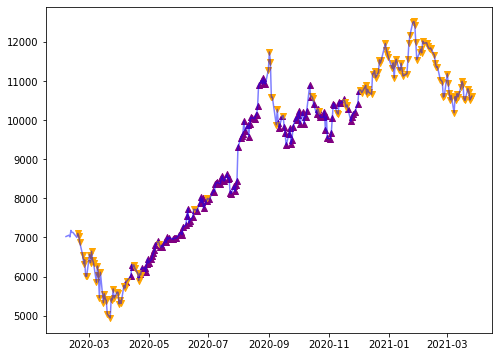

In [97]:
model.eval()

preds = []

for i, (x, y) in enumerate(train_inout_seq):
    #print(x)
    #print(model(x.view(len(x), 1, -1).float()))
    preds.append(torch.argmax(model(x.view(len(x), 1, -1).float())).item())

print(set(preds))

plot_preds(train_df,preds,show_true=False)

{0, 1}


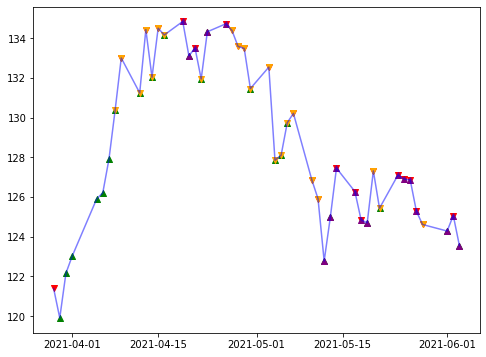

In [98]:
model.eval()

preds = []

for i, (x, y) in enumerate(val_inout_seq):
    #print(x)
    #print(model(x.view(len(x), 1, -1).float()))
    preds.append(torch.argmax(model(x.view(len(x), 1, -1).float())).item())


print(set(preds))
plot_preds(val_df,preds)
    

In [99]:
model.eval()

preds = []

for i, (x, y) in enumerate(test_inout_seq):
    #print(x)
    #print(model(x.view(len(x), 1, -1).float()))
    preds.append(torch.argmax(model(x.view(len(x), 1, -1).float())).item())

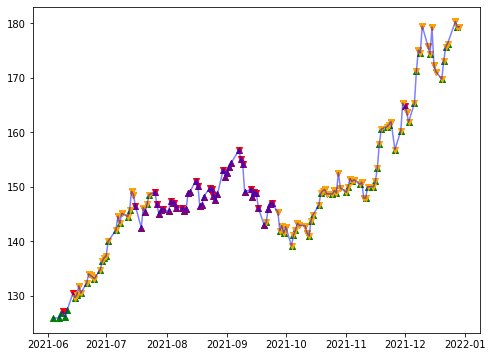

In [100]:
plot_preds(test_df,preds, show_true=True)

In [83]:
# model hyperparater tuning
# metric needed to see how well model is doing (amount profit, grace period of true days)
# regression

In [84]:
import math

In [85]:
def calc_pred_profit(df, preds, window_size = 7, num_shares=1):
    df["Pred Buy"] = [np.nan] * window_size + [df.iloc[i+window_size]["Close"] if preds[i] == 1 else np.nan for i in range(len(preds))]
    df["Pred Sell"] = [np.nan] * window_size + [df.iloc[i+window_size]["Close"] if preds[i] == 0 else np.nan for i in range(len(preds))]

    pred_buy_share = []
    pred_sell_share = []
    
    bought = False
    inventory = num_shares
    total_profit = 0
    buy_in = 0
    sell_out = 0
    for i in range(len(df)):
        if (not math.isnan(df["Pred Buy"][i]) and inventory > 0):
        #if (not math.isnan(df["Pred Buy"][i]) and not bought):
            buy_in = df["Pred Buy"][i]
            bought=True
            inventory -= 1
        
        if (not math.isnan(df["Pred Sell"][i]) and inventory <= num_shares):
        #if (not math.isnan(df["Pred Sell"][i]) and bought):
            sell_out = df["Pred Sell"][i]
            bought=False
            inventory += 1


        if (buy_in != 0 and sell_out != 0):
            profit = sell_out - buy_in
            total_profit += profit
            buy_in = 0
            sell_out = 0
    
    buy_hold_profit = df["Close"][-1] - df["Close"][window_size]

    return total_profit, buy_hold_profit

In [86]:
calc_pred_profit(val_df, preds)

IndexError: single positional indexer is out-of-bounds

In [ ]:
# maybe add time since last buy as a feature????